In [1]:
import numpy as np
import pandas as pd

In [2]:
sentiment_data= pd.read_csv('gs://hw1part1/msft_sentiments.csv', error_bad_lines=False)
sentiment_data

,Unnamed: 0,Date,Close,Comp,Negative,Neutral,Positive
0,0,2015-01-08,47.590,0.4767,0.000,0.744,0.256
1,1,2015-01-13,46.355,0.0000,0.000,1.000,0.000
2,2,2015-01-19,46.240,0.2732,0.000,0.851,0.149
3,3,2015-01-21,45.920,0.2960,0.000,0.804,0.196
4,4,2015-01-21,45.920,0.0000,0.000,1.000,0.000
...,...,...,...,...,...,...,...
320644,320644,2019-02-25,111.590,0.5574,0.068,0.747,0.185
320645,320645,2019-02-25,111.590,0.4648,0.000,0.918,0.082
320646,320646,2019-02-25,111.590,0.5719,0.000,0.861,0.139
320647,320647,2019-02-26,112.360,0.6249,0.000,0.831,0.169


In [3]:
sentiment_data=sentiment_data.drop("Unnamed: 0" ,axis=1)
sentiment_data

,Date,Close,Comp,Negative,Neutral,Positive
0,2015-01-08,47.590,0.4767,0.000,0.744,0.256
1,2015-01-13,46.355,0.0000,0.000,1.000,0.000
2,2015-01-19,46.240,0.2732,0.000,0.851,0.149
3,2015-01-21,45.920,0.2960,0.000,0.804,0.196
4,2015-01-21,45.920,0.0000,0.000,1.000,0.000
...,...,...,...,...,...,...
320644,2019-02-25,111.590,0.5574,0.068,0.747,0.185
320645,2019-02-25,111.590,0.4648,0.000,0.918,0.082
320646,2019-02-25,111.590,0.5719,0.000,0.861,0.139
320647,2019-02-26,112.360,0.6249,0.000,0.831,0.169


In [4]:
new_df=sentiment_data[(sentiment_data['Date'] >= '2018-01-01') & (sentiment_data['Date'] < '2019-01-01')]
new_df

,Date,Close,Comp,Negative,Neutral,Positive
173847,2018-01-01,85.54,0.0000,0.000,1.000,0.000
173848,2018-01-03,86.35,0.0000,0.000,1.000,0.000
173849,2018-01-03,86.35,0.0000,0.000,1.000,0.000
173850,2018-01-05,88.19,0.0000,0.000,1.000,0.000
173851,2018-01-05,88.19,0.0000,0.000,1.000,0.000
...,...,...,...,...,...,...
320582,2018-12-18,103.97,-0.2960,0.239,0.761,0.000
320583,2018-12-19,103.69,0.0516,0.137,0.714,0.149
320584,2018-12-21,98.23,0.0000,0.000,1.000,0.000
320585,2018-12-25,94.13,0.4404,0.000,0.674,0.326


In [5]:
new_df = new_df.reset_index(drop=True)
new_df

,Date,Close,Comp,Negative,Neutral,Positive
0,2018-01-01,85.54,0.0000,0.000,1.000,0.000
1,2018-01-03,86.35,0.0000,0.000,1.000,0.000
2,2018-01-03,86.35,0.0000,0.000,1.000,0.000
3,2018-01-05,88.19,0.0000,0.000,1.000,0.000
4,2018-01-05,88.19,0.0000,0.000,1.000,0.000
...,...,...,...,...,...,...
59773,2018-12-18,103.97,-0.2960,0.239,0.761,0.000
59774,2018-12-19,103.69,0.0516,0.137,0.714,0.149
59775,2018-12-21,98.23,0.0000,0.000,1.000,0.000
59776,2018-12-25,94.13,0.4404,0.000,0.674,0.326


In [6]:
ccdata=new_df

ccdata['Prices2'] = None
ccdata['Prices3'] = None
ccdata['Prices4'] = None
for i in range(len(ccdata)):
    ccdata.loc[i,'Prices2'] = ccdata.iloc[i-1,1]
for i in range(len(ccdata)):
    ccdata.loc[i,'Prices3'] = ccdata.iloc[i-2,1]
for i in range(len(ccdata)):
    ccdata.loc[i,'Prices4'] = ccdata.iloc[i-3,1]

ccdata.loc[0,'Prices2'] = ccdata.iloc[0,1]
ccdata.loc[0,'Prices3'] = ccdata.iloc[0,1]
ccdata.loc[0,'Prices4'] = ccdata.iloc[0,1]


ccdata.loc[1,'Prices3'] = ccdata.iloc[0,1]
ccdata.loc[1,'Prices4'] = ccdata.iloc[0,1]
ccdata.loc[2,'Prices4'] = ccdata.iloc[0,1]

# ccdata.loc[3,'NASDAQ4'] = None
# ccdata.loc[3,'Prices4'] = None
ccdata

,Date,Close,Comp,Negative,Neutral,Positive,Prices2,Prices3,Prices4
0,2018-01-01,85.54,0.0000,0.000,1.000,0.000,85.54,85.54,85.54
1,2018-01-03,86.35,0.0000,0.000,1.000,0.000,85.54,85.54,85.54
2,2018-01-03,86.35,0.0000,0.000,1.000,0.000,86.35,85.54,85.54
3,2018-01-05,88.19,0.0000,0.000,1.000,0.000,86.35,86.35,85.54
4,2018-01-05,88.19,0.0000,0.000,1.000,0.000,88.19,86.35,86.35
...,...,...,...,...,...,...,...,...,...
59773,2018-12-18,103.97,-0.2960,0.239,0.761,0.000,109.45,109.08,109.08
59774,2018-12-19,103.69,0.0516,0.137,0.714,0.149,103.97,109.45,109.08
59775,2018-12-21,98.23,0.0000,0.000,1.000,0.000,103.69,103.97,109.45
59776,2018-12-25,94.13,0.4404,0.000,0.674,0.326,98.23,103.69,103.97


In [7]:
sentiment_data=ccdata
train,test = np.split(sentiment_data, [int(.7*len(sentiment_data))])
train

,Date,Close,Comp,Negative,Neutral,Positive,Prices2,Prices3,Prices4
0,2018-01-01,85.54,0.0000,0.000,1.000,0.000,85.54,85.54,85.54
1,2018-01-03,86.35,0.0000,0.000,1.000,0.000,85.54,85.54,85.54
2,2018-01-03,86.35,0.0000,0.000,1.000,0.000,86.35,85.54,85.54
3,2018-01-05,88.19,0.0000,0.000,1.000,0.000,86.35,86.35,85.54
4,2018-01-05,88.19,0.0000,0.000,1.000,0.000,88.19,86.35,86.35
...,...,...,...,...,...,...,...,...,...
41839,2018-12-01,110.89,0.2500,0.094,0.750,0.156,110.89,110.89,110.19
41840,2018-12-02,110.89,0.4404,0.000,0.674,0.326,110.89,110.89,110.89
41841,2018-12-06,109.19,-0.5538,0.114,0.848,0.038,110.89,110.89,110.89
41842,2018-12-08,104.82,0.0000,0.000,1.000,0.000,109.19,110.89,110.89


In [8]:
test

,Date,Close,Comp,Negative,Neutral,Positive,Prices2,Prices3,Prices4
41844,2018-12-10,107.59,0.4215,0.000,0.797,0.203,104.82,104.82,109.19
41845,2018-12-11,108.59,0.0000,0.000,1.000,0.000,107.59,104.82,104.82
41846,2018-12-11,108.59,0.5106,0.000,0.809,0.191,108.59,107.59,104.82
41847,2018-12-11,108.59,0.0772,0.000,0.958,0.042,108.59,108.59,107.59
41848,2018-12-18,103.97,0.2500,0.000,0.846,0.154,108.59,108.59,108.59
...,...,...,...,...,...,...,...,...,...
59773,2018-12-18,103.97,-0.2960,0.239,0.761,0.000,109.45,109.08,109.08
59774,2018-12-19,103.69,0.0516,0.137,0.714,0.149,103.97,109.45,109.08
59775,2018-12-21,98.23,0.0000,0.000,1.000,0.000,103.69,103.97,109.45
59776,2018-12-25,94.13,0.4404,0.000,0.674,0.326,98.23,103.69,103.97


In [9]:
new_train=test.head(200)
new_test=test.tail(80)

In [10]:
sentiment_score_list = []

for date, row in new_train.T.iteritems():

 
    if date>0:
        sentiment_score = np.asarray([sentiment_data.loc[date, 'Negative'],sentiment_data.loc[date, 'Neutral'],
                                      sentiment_data.loc[date, 'Positive'],
#                                       sentiment_data.loc[date-1, 'Close'],
                                      sentiment_data.loc[date-1,'Prices2'],
                                      sentiment_data.loc[date-1,'Prices3'],
                                      sentiment_data.loc[date-1,'Prices4'], 
                                       ])
        
    else:
        sentiment_score = np.asarray([sentiment_data.loc[date, 'Negative'],sentiment_data.loc[date, 'Neutral'],
                                      sentiment_data.loc[date, 'Positive'], 
#                                       sentiment_data.loc[date, 'Close'],
                                      sentiment_data.loc[date,'Prices2'],
                                      sentiment_data.loc[date,'Prices3'], 
                                      sentiment_data.loc[date,'Prices4'], 
                                      ])
 

    sentiment_score_list.append(sentiment_score)

numpy_df_train = np.asarray(sentiment_score_list)
print(numpy_df_train)
print(len(numpy_df_train))

[[0.0000e+00 7.9700e-01 2.0300e-01 1.0482e+02 1.0919e+02 1.1089e+02]
 [0.0000e+00 1.0000e+00 0.0000e+00 1.0482e+02 1.0482e+02 1.0919e+02]
 [0.0000e+00 8.0900e-01 1.9100e-01 1.0759e+02 1.0482e+02 1.0482e+02]
 ...
 [0.0000e+00 1.0000e+00 0.0000e+00 1.0603e+02 1.0945e+02 1.0945e+02]
 [0.0000e+00 7.4800e-01 2.5200e-01 1.0397e+02 1.0603e+02 1.0945e+02]
 [0.0000e+00 9.1700e-01 8.3000e-02 1.0369e+02 1.0397e+02 1.0603e+02]]
200


In [11]:
sentiment_score_list = []

for date, row in new_test.T.iteritems():

 
    if date>0:
        sentiment_score = np.asarray([sentiment_data.loc[date, 'Negative'],sentiment_data.loc[date, 'Neutral'],
                                      sentiment_data.loc[date, 'Positive'],
#                                       sentiment_data.loc[date-1, 'Close'],
                                      sentiment_data.loc[date-1,'Prices2'],
                                      sentiment_data.loc[date-1,'Prices3'],
                                      sentiment_data.loc[date-1,'Prices4'], 
                                      ])
        
    else:
        sentiment_score = np.asarray([sentiment_data.loc[date, 'Negative'],sentiment_data.loc[date, 'Neutral'],
                                      sentiment_data.loc[date, 'Positive'],
#                                       sentiment_data.loc[date, 'Close'],
                                      sentiment_data.loc[date,'Prices2'],
                                      sentiment_data.loc[date,'Prices3'], 
                                      sentiment_data.loc[date,'Prices4'], 
                                      ])
 

    sentiment_score_list.append(sentiment_score)

numpy_df_test = np.asarray(sentiment_score_list)
print(numpy_df_test)
print(len(numpy_df_test))

[[0.0000e+00 1.0000e+00 0.0000e+00 1.1337e+02 1.1337e+02 1.1291e+02]
 [0.0000e+00 1.0000e+00 0.0000e+00 1.1337e+02 1.1337e+02 1.1337e+02]
 [0.0000e+00 1.0000e+00 0.0000e+00 1.1321e+02 1.1337e+02 1.1337e+02]
 [0.0000e+00 1.0000e+00 0.0000e+00 1.1170e+02 1.1321e+02 1.1337e+02]
 [0.0000e+00 5.2300e-01 4.7700e-01 1.1426e+02 1.1170e+02 1.1321e+02]
 [1.5300e-01 6.3100e-01 2.1600e-01 1.1467e+02 1.1426e+02 1.1170e+02]
 [1.2000e-01 8.8000e-01 0.0000e+00 1.1467e+02 1.1467e+02 1.1426e+02]
 [0.0000e+00 1.0000e+00 0.0000e+00 1.1467e+02 1.1467e+02 1.1467e+02]
 [7.2000e-02 8.5400e-01 7.4000e-02 1.1445e+02 1.1467e+02 1.1467e+02]
 [0.0000e+00 9.5400e-01 4.6000e-02 1.1445e+02 1.1445e+02 1.1467e+02]
 [0.0000e+00 1.0000e+00 0.0000e+00 1.1441e+02 1.1445e+02 1.1445e+02]
 [0.0000e+00 9.2000e-01 8.0000e-02 1.1441e+02 1.1441e+02 1.1445e+02]
 [0.0000e+00 1.0000e+00 0.0000e+00 1.1437e+02 1.1441e+02 1.1441e+02]
 [4.9000e-02 9.5100e-01 0.0000e+00 1.1437e+02 1.1437e+02 1.1441e+02]
 [0.0000e+00 6.5600e-01 3.4400e-01

In [12]:
numpy_df_train[0:0]

array([], shape=(0, 6), dtype=float64)

In [13]:
y_train = pd.DataFrame(new_train['Close'])
y_train=y_train.reset_index(drop=True)

y_test = pd.DataFrame(new_test['Close'])
y_test=y_test.reset_index(drop=True)
y_train

,Close
0,107.59
1,108.59
2,108.59
3,108.59
4,103.97
...,...
195,106.03
196,103.97
197,103.69
198,101.51


In [14]:
# from treeinterpreter import treeinterpreter as ti
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.neural_network import MLPClassifier,MLPRegressor
from sklearn.linear_model import LinearRegression

!! pip install treeinterpreter

['Requirement already satisfied: treeinterpreter in /opt/conda/miniconda3/lib/python3.8/site-packages (0.2.3)',
 "WARNING: Running pip as the 'root' user can result in broken permissions and conflicting behaviour with the system package manager. It is recommended to use a virtual environment instead: https://pip.pypa.io/warnings/venv"]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79]


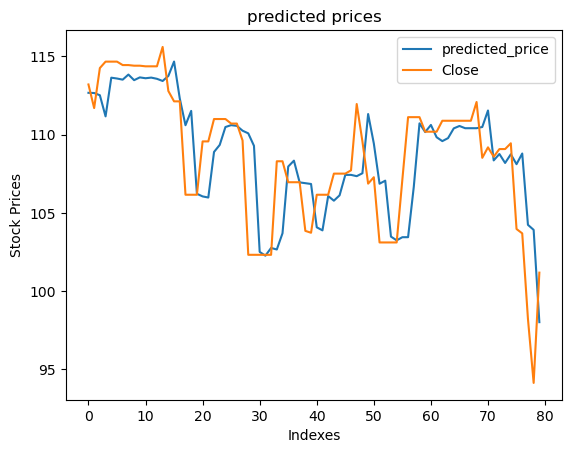

In [15]:
#try Linear Regression

linreg = LinearRegression()
linreg.fit(numpy_df_train, y_train)
prediction = linreg.predict(numpy_df_test)


# from treeinterpreter import treeinterpreter as ti
# # try Random Forest
# rf = RandomForestRegressor()
# rf.fit(numpy_df_train, y_train)

# prediction, bias, contributions = ti.predict(rf, numpy_df_test)
# print(prediction)

# #try MLP method
# scaler.fit(numpy_df_train)
# numpy_df_train = scaler.transform(numpy_df_train)
# numpy_df_test = scaler.transform(numpy_df_test)
# mlp = MLPRegressor(hidden_layer_sizes=(50,50,50,50), max_iter=15000, solver='sgd')
# # print(numpy_df_train)



# mlp.fit(numpy_df_train, y_train.values.ravel())
# mlp.fit(numpy_df_train[:,0:9], y_train)
# prediction = mlp.predict(numpy_df_test[:,0:9])
# print(numpy_df_test[:,3:5])

# prediction = mlp.predict(numpy_df_test)
# print(prediction)


import matplotlib.pyplot as plt
idx=np.arange(0,len(y_test))
print(idx)

predictions_df = pd.DataFrame(data=prediction[0:], index = idx, columns=['Prices'])

#predictions_df_

ax = predictions_df.rename(columns={"Prices": "predicted_price"}).plot(title='predicted prices')#predicted value
ax.set_xlabel("Indexes")
ax.set_ylabel("Stock Prices")
fig = y_test.rename(columns={"Prices": "actual_price"}).plot(ax = ax).get_figure()#actual value
# fig.savefig("random forest.png")